In [20]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import importlib

import kaggle_functions as kaggle
import model11_stacking
importlib.reload(kaggle); 
importlib.reload(model11_stacking);
from model11_stacking import Model, model_number

### Create datasets

In [2]:
train_dataset, valid_dataset, valid_labels = kaggle.load_train_as_dataset()

batch_size = 32
# train_dataset_augmented, epoch_length = kaggle.augment_dataset(train_dataset, batch_size)

In [3]:
# For stacking only
test_dataset = kaggle.load_test_set()
[prediction_train_set, prediction_valid_set, prediction_test_set] = model11_stacking.generate_predictions_for_datasets(
    [train_dataset, valid_dataset, test_dataset])

Loading base models
Predicting for set 1
Predicting for set 2
Predicting for set 3


In [ ]:
kaggle.show_images(train_dataset, 9)

## Train new model

In [21]:
# Fit model
# See {model}.py for specific training instructions, like epochs or valid_patience
model_name = 'Stacking_2'

model, history = kaggle.train_model(
    Model().build(None), prediction_train_set, prediction_valid_set, 
    epochs=10, valid_patience=4)

Epoch 1/10
298/298 [==============================] - 8s 21ms/step - loss: 252.8317 - accuracy: 0.9348 - val_loss: 156.9461 - val_accuracy: 0.7330 - lr: 1.0000e-04
Epoch 2/10
298/298 [==============================] - 6s 21ms/step - loss: 100.8393 - accuracy: 0.9931 - val_loss: 60.0172 - val_accuracy: 0.8558 - lr: 1.0000e-04
Epoch 3/10
298/298 [==============================] - 6s 19ms/step - loss: 37.2375 - accuracy: 0.9983 - val_loss: 21.6244 - val_accuracy: 0.8831 - lr: 1.0000e-04
Epoch 4/10
298/298 [==============================] - 6s 19ms/step - loss: 12.9496 - accuracy: 0.9996 - val_loss: 7.7386 - val_accuracy: 0.8940 - lr: 1.0000e-04
Epoch 5/10
298/298 [==============================] - 6s 19ms/step - loss: 4.5228 - accuracy: 0.9997 - val_loss: 3.0574 - val_accuracy: 0.9008 - lr: 1.0000e-04
Epoch 6/10
298/298 [==============================] - 6s 20ms/step - loss: 1.8816 - accuracy: 0.9996 - val_loss: 1.6403 - val_accuracy: 0.8982 - lr: 1.0000e-04
Epoch 7/10
298/298 [==========

INFO:tensorflow:Assets written to: models/model11/Stacking_2_90\assets


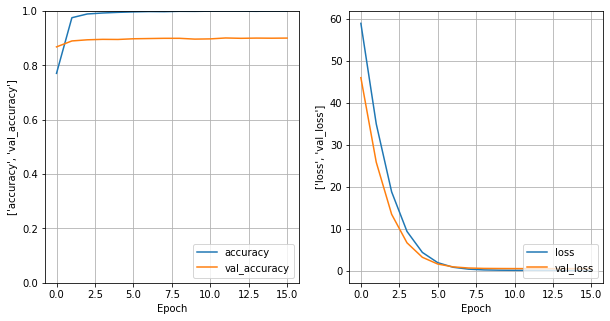

In [17]:
# Save model
model.save(f'models/{model_number}/{model_name}_90')

# Plot model statistics during training
kaggle.plot_model_history(history, [['accuracy', 'val_accuracy'], ['loss', 'val_loss']])

In [3]:
model = keras.models.load_model(f'models/{model_number}/WideResNet_2_73')

### Fine-tune

In [30]:
# Fine-tune model
fine_model, history = kaggle.fine_tune_model(
    model,
    train_dataset, valid_dataset, 
    epochs=1, learning_rate=1E-5)

C:\Users\Guillaume\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


372/372 [==============================] - 235s 611ms/step - loss: 2.3633 - accuracy: 0.8853 - val_loss: 2.4720 - val_accuracy: 0.8667


In [14]:
# Save fine-tuned model
fine_model_name = 'Stacking_2'
fine_model.save(f'models/{model_number}/{fine_model_name}')

INFO:tensorflow:Assets written to: models/model11/Stacking_2\assets


C:\Users\Guillaume\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\Guillaume\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


### Evaluate

Accuracy: 0.8995


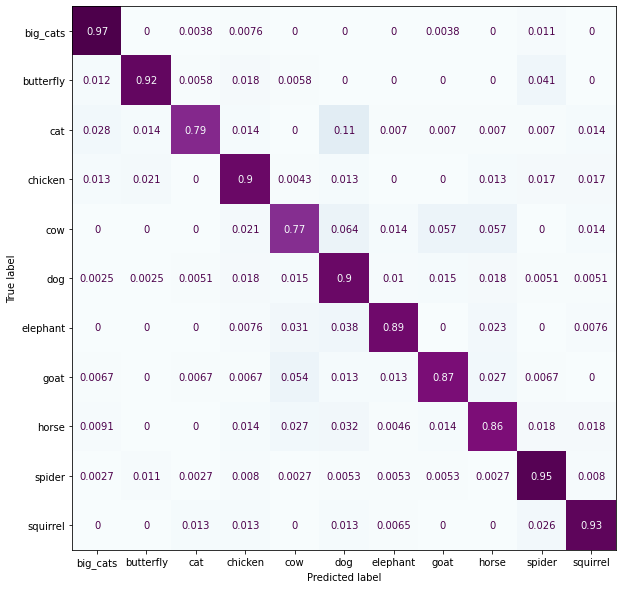

In [24]:
model_name = ''
# model = keras.models.load_model(f'models/{model_number}/{model_name}')
test_pred = np.argmax(model.predict(prediction_valid_set), axis=1)

kaggle.print_accuracy(valid_labels, test_pred)
kaggle.plot_confusion_matrix(valid_labels, test_pred)

### Generate test predictions

In [6]:
model_name = 'Stacking_2_90'
kaggle.generate_test_pred_filepath(f'models/model10/{model_name}')

Model found, generating predictions...


In [ ]:
kaggle.generate_test_pred(fine_model, f'models/{model_number}/{model_name}_test_pred.csv')

### Hypertune models

In [23]:
importlib.reload(model11_stacking);
from model11_stacking import Model, model_number

tuner = kaggle.hypertune_model(
    Model(), prediction_train_set, prediction_valid_set, 
    model_number, 'hypertuner2021-12-07-3', trials=50, tuner_type='bayesian',
    epochs=15, valid_patience=5)

Trial 50 Complete [00h 01m 34s]
val_accuracy: 0.8809924125671387

Best val_accuracy So Far: 0.8835155367851257
Total elapsed time: 01h 11m 20s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in models/model11\hypertuner2021-12-07-2
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
learning_rate: 0.00020352321119046748
l2_reg: 0.001
dropout: 0.1
k: 1
Score: 0.8835155367851257
Trial summary
Hyperparameters:
learning_rate: 0.01
l2_reg: 1e-06
dropout: 0.39648716463555567
k: 1
Score: 0.882674515247345
Trial summary
Hyperparameters:
learning_rate: 0.01
l2_reg: 7.060596318347639e-06
dropout: 0.6
k: 3
Score: 0.882674515247345
Trial summary
Hyperparameters:
learning_rate: 0.00015390615337762908
l2_reg: 1e-06
dropout: 0.3078143080667213
k: 3
Score: 0.882674515247345
Trial summary
Hyperparameters:
learning_rate: 0.01
l2_reg: 0.00032067998940912563
dropout: 0.6
k: 3
Score: 0.8822540044784546
Trial summary
Hyperparameters:
learning_r

In [ ]:
tuner = kaggle.load_hypertuner(Model(), model_number, 'hypertuner2021-12-03')

In [23]:
model = tuner.get_best_models(1)[0]